In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pylab
import glob
import pandas as pd
import math as math
import os

In [74]:
VSS= np.loadtxt(fname='media_anual_VSS.csv', delimiter=',', usecols= (0,1,2,3,4,5,6,7))

In [75]:
VSS[:,4]

array([ 24308.,  24238.,  24206.,  24021.,  23968.,  23932.,  23895.,
        23853.,  23810.,  23764.,  23717.,  23668.,  23619.,  23569.,
        23520.,  23471.,  23424.,  23380.,  23339.,  23297.,  23257.,
        23213.,  23163.,  23111.,  23059.,  23004.,  22949.,  22891.,
        22830.,  22764.,  22694.,  22621.,  22547.,  22474.,  22400.,
        22357.,  22249.,  22166.,  22092.,  22018.,  21941.,  21848.,
        21766.,  21696.,  21658.,  21579.,  21501.,  21407.,  21320.,
        21259.,  21182.,  21102.,  21023.,  20935.,  20859.,  20782.,
        20699.,  20625.,  20531.,  20448.,  20376.,  20303.,  20205.,
        20132.,  20041.,  19952.,  19871.,  19740.,  19615.,  19559.,
        19489.,  19406.,  19320.,  19237.,  19151.,  19062.,  18961.,
        18888.,  18790.,  18715.,  18623.,  18564.,  18454.,  18361.,
        18274.,  18185.,  18106.,  18022.,  17927.,  17856.,  17759.,
        17699.,  17622.,  17537.,  17452.,  17338.,  17230.,  17099.,
        17031.,  169

In [76]:
def sec_var(a):
    "determine secular variation for components of geomagnetic field."
    '''
    a - column data
    '''
    
    N = a.size
    sv = np.zeros(N)
    
    for i in range(N-1):
        sv[i+1] = a[i+1] - a[i]
    
    return sv

In [77]:
#SECULAR VARIATION FOR VASSOURAS MAGNETIC OBSERVATORY DATA FROM 1915 TO 2015:

Year = VSS[:,0]
sv_d = sec_var(VSS[:,1])
sv_i = sec_var(VSS[:,2])
sv_x = sec_var(VSS[:,4])
sv_y = sec_var(VSS[:,5])
sv_z = sec_var(VSS[:,6])
sv_f = sec_var(VSS[:,7])

In [78]:
print('year', len(Year))
print('sv_x', len(sv_x))

year 101
sv_x 101


In [79]:
sv_x

array([   0.,  -70.,  -32., -185.,  -53.,  -36.,  -37.,  -42.,  -43.,
        -46.,  -47.,  -49.,  -49.,  -50.,  -49.,  -49.,  -47.,  -44.,
        -41.,  -42.,  -40.,  -44.,  -50.,  -52.,  -52.,  -55.,  -55.,
        -58.,  -61.,  -66.,  -70.,  -73.,  -74.,  -73.,  -74.,  -43.,
       -108.,  -83.,  -74.,  -74.,  -77.,  -93.,  -82.,  -70.,  -38.,
        -79.,  -78.,  -94.,  -87.,  -61.,  -77.,  -80.,  -79.,  -88.,
        -76.,  -77.,  -83.,  -74.,  -94.,  -83.,  -72.,  -73.,  -98.,
        -73.,  -91.,  -89.,  -81., -131., -125.,  -56.,  -70.,  -83.,
        -86.,  -83.,  -86.,  -89., -101.,  -73.,  -98.,  -75.,  -92.,
        -59., -110.,  -93.,  -87.,  -89.,  -79.,  -84.,  -95.,  -71.,
        -97.,  -60.,  -77.,  -85.,  -85., -114., -108., -131.,  -68.,
        -89., -101.])

C:\ProgramData\Anaconda3\lib\site-packages\matplotlib\font_manager.py:1297: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


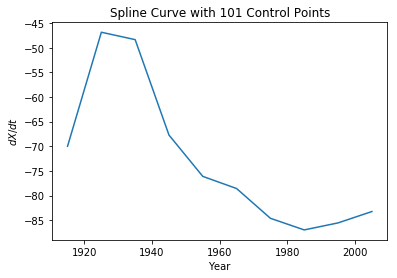

In [80]:


#plt.rc('font', **{'family':'sans-serif', 'sans-serif':['Helvetica']})

def splerp(t, control_points):
  if len(control_points) == 1:
    return control_points[0]

  derived_points = []
  for (x0, y0), (x1, y1) in zip(control_points, control_points[1:]):
    x = x0 + t*(x1-x0)
    y = y0 + t*(y1-y0)
    derived_points.append((x, y))

  return splerp(t, derived_points)


def plot_spline(control_points, fig_name="spline"):
  interpolated_points = []
  for t in np.arange(0, 1, 0.1):
    interpolated_points.append(splerp(t, control_points))

  plt.figure(0)
  plt.clf()
  plt.plot([p[0] for p in interpolated_points], [p[1] for p in interpolated_points])
  plt.title('Spline Curve with ' + str(len(control_points)) + ' Control Points')
  plt.xlabel('Year')
  plt.ylabel('$ dX/dt$')
  plt.savefig(fig_name+".png")
  plt.show()


#plot_spline([(0, 0), (3, 6)], 'spline2')
plot_spline([(1915, -70), (1916, -32), (1917, -185), (1918, -53), (1919,-36),(1920,-37),(1921,-42.),  (1922,-43.),
        (1923,-46.), (1924,-47.), (1925,-49.),(1926, -49.), (1927,-50.),(1928, -49.), (1929,-49.), (1930,-47.), 
        (1931,-44.), (1932,-41.), (1933,-42.),(1934, -40.), (1935,-44.),(1936, -50.), (1937,-52.), (1938,-52.),
        (1939,-55.), (1940,-55.), (1941,-58.),(1942, -61.), (1943,-66.),(1944,-70.),(1945,-73.),(1946,-74.),(1947,-73.),
        (1948,-74.), (1949,-43.), (1950,-108.),(1951,-83.), (1952,-74.),(1953,-74.),(1954,-77.),(1955,-93.),(1956,-82.), 
        (1957,-70.), (1958,-38.), (1959,-79.), (1960,-78.), (1961,-94.),(1962,-87.),(1963,-61.),(1964,-77.),(1965,-80.),
        (1966,-79.), (1967,-88.), (1968,-76.), (1969,-77.), (1970,-83.),(1971,-74.),(1972,-94.),(1973,-83.),(1974,-72.),
        (1975,-73.), (1976,-98.), (1977,-73.), (1978,-91.), (1979,-89.),(1980,-81.),(1981,-131.),(1982,-125.),
        (1983,-56.), (1984,-70.), (1985,-83.), (1986,-86.), (1987,-83.),(1988,-86.),(1989,-89.),(1990,-101.),(1991,-73.),
        (1992,-73.), (1993, -98.),(1994,-75.), (1995,-92.),(1996, -59.),(1997, -110.),(1998, -93.),(1999, -87.),(2000, -89.), 
        (2001,-79.), (2002, -84.),(2003,-95.), (2004,-71.),(2005, -97.),(2006, -60.), (2007, -77.),(2008, -85.), (2009, -85.),
        (2010,-114.),(2013, -108.), (2011,-131.),(2012,-68.),(2014,-89.), (2015, -101.)], 'spline101')